In [1]:
import pandas as pd
# get data from boston area
hmdaUrl = "../data/msamd_14454.csv"
data = pd.read_csv(hmdaUrl)
data.shape
data.head(5)

/var/folders/h4/qv9ymlxn5v54y1vnffsnvmlr0000gn/T/ipykernel_83197/4145971400.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(hmdaUrl)


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


In [2]:
ndt = data[data['loan_purpose']==1]

In [3]:
# group by census tract and loan type
grouped_data = ndt.groupby(["census_tract", "loan_type"])

# count the number of loans in each group
loan_counts = grouped_data.size()

loan_counts.to_csv("../data/loan_type_counts_by_censusTract.csv", header=["count"])

   OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0         1        25        025    140202  25025140202  1402.02   
1         2        25        025    140300  25025140300     1403   
2         3        25        025    140400  25025140400     1404   
3         4        25        025    140106  25025140106  1401.06   
4         5        25        025    110201  25025110201  1102.01   

     NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0  Census Tract   G5020          S  1538599     17120  +42.2495181   
1  Census Tract   G5020          S  1548879     38736  +42.2587734   
2  Census Tract   G5020          S  1874512     11680  +42.2692219   
3  Census Tract   G5020          S   278837      3116  +42.2738738   
4  Census Tract   G5020          S   348208         0  +42.2804960   

     INTPTLON20    Shape_STAr    Shape_STLe  \
0  -071.1175430  1.674441e+07  18525.133039   
1  -071.1188131  1.708768e+07  24186.699503   
2  -071.1118088  2.030132e+07

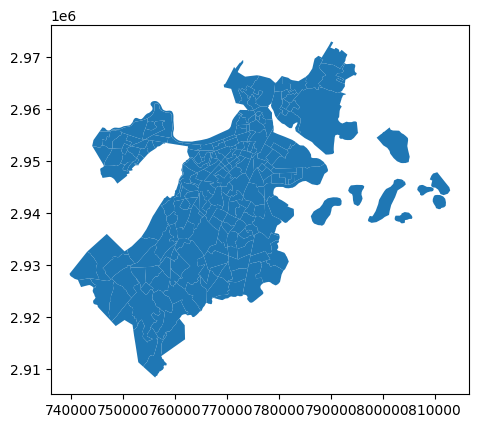

In [7]:
#census_tract_data/Census2020_Tracts
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# load the shapefile
shapefile_path = "../data/census_tract_data/Census2020_Tracts.shp"
tracts = gpd.read_file(shapefile_path)

# print(tracts.crs)  # 查看数据对应的投影信息
print(tracts.head())  # 查看前5行数据
tracts.plot()
plt.show()#简单展示


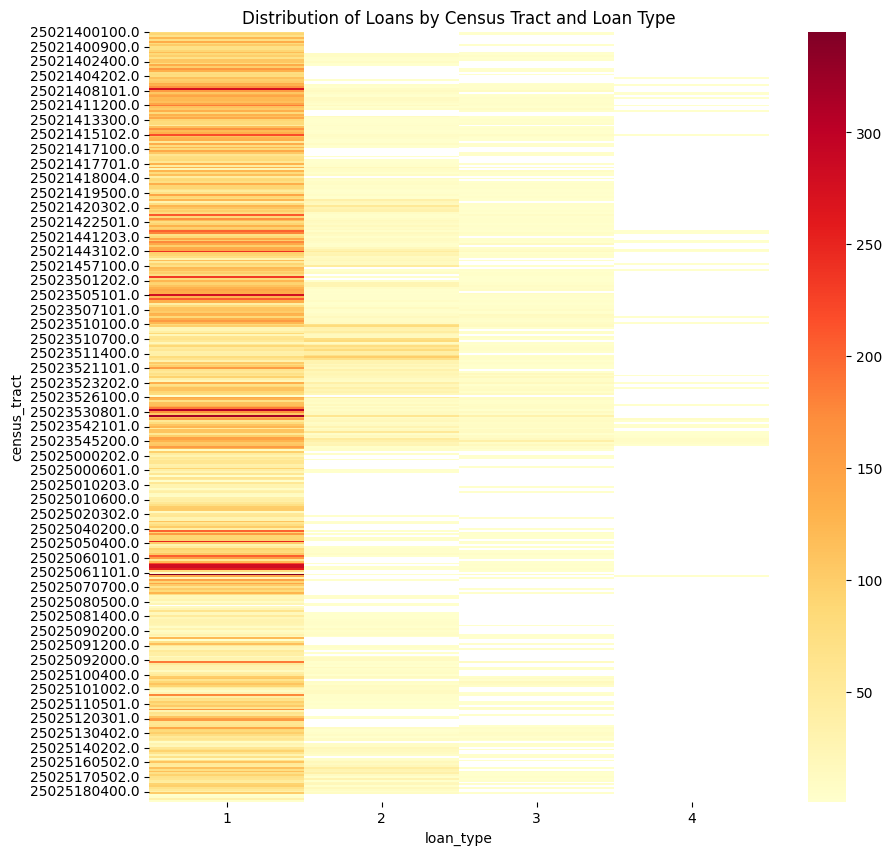

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Reset the index to create a DataFrame
loan_counts = loan_counts.reset_index(name="count")

# create a pivot table to reshape the data
loan_counts_pivot = loan_counts.reset_index().pivot(index='census_tract', columns='loan_type', values='count')

# create the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(loan_counts_pivot, cmap='YlOrRd', ax=ax)
ax.set_title('Distribution of Loans by Census Tract and Loan Type')
plt.show()


In [8]:
loan_counts

,census_tract,loan_type,count
0,2.502140e+10,1,78
1,2.502140e+10,3,1
2,2.502140e+10,1,90
3,2.502140e+10,3,1
4,2.502140e+10,1,68
...,...,...,...
1015,2.502518e+10,3,2
1016,2.502598e+10,1,1
1017,2.502598e+10,1,6
1018,2.502598e+10,1,33


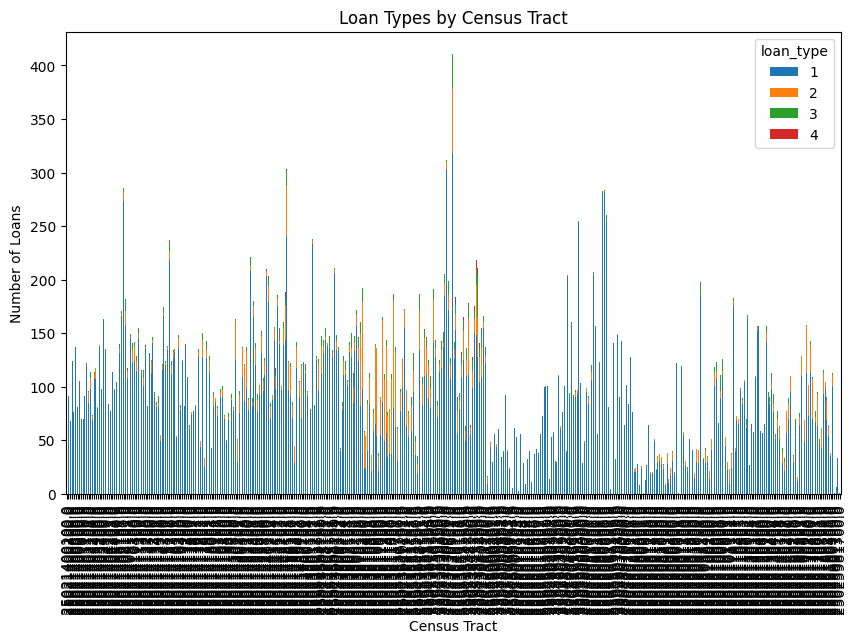

In [13]:
# Create the stacked bar chart
ax = loan_counts_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_xlabel("Census Tract")
ax.set_ylabel("Number of Loans")
ax.set_title("Loan Types by Census Tract")
plt.show()